<a href="https://colab.research.google.com/github/SimonHanzal/explorative_protocols/blob/main/neural_net_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Old

In [ ]:

#!pip install mne_connectivity
# raw = mne.io.read_raw_brainvision(data_path)
# epochs = mne.make_fixed_length_epochs(raw, duration=1, preload=True)
#raw_highpass = raw.copy().filter(l_freq=2, h_freq=40)
#covariance.plot(raw.info, proj=True)

In [ ]:
!pip install mne

#Set-up

Imports

In [ ]:
import h5py
import matplotlib.pyplot as plt
import mne
import numpy as np
import seaborn as sns
import scipy.io as sc
import scipy.stats as st
from mne_connectivity import envelope_correlation
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Running classifier in a simple scenario

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

0.9595782073813708

Loading in my own data

In [ ]:
ms_parts = np.empty((64,64,10))
participant_list = ["10000_m.set", "10001_m.set",
                    "10002_m.set", "10003_m.set", "10005_m.set",
                    "10000_e.set", "10001_e.set",
                    "10002_e.set", "10003_e.set", "10005_e.set"]

participant_early_late = ["10000_e.set", "10001_e.set",
                    "10002_e.set", "10003_e.set", "10005_e.set",
                    "10000_e.set", "10001_e.set",
                    "10002_e.set", "10003_e.set", "10005_e.set"]

data_path = "/content/drive/MyDrive/resting_state/"

# Splitting into early and late data segments (pure amplitudes!)
for i in range(len(participant_list)):
  raw = mne.io.read_epochs_eeglab(data_path + participant_early_late[i])
  if i > 4:
    raw = raw.drop(range(1,630))
  elif i <= 4:
    raw = raw.drop(range(85,len(raw.events)))
  raw = raw.crop(-1.1, -0.1)
  covariance = mne.compute_covariance(raw)
  ms_parts[:,:,i] = covariance.data
ms_parts = ms_parts.reshape((640, 64))

# Next step: Either tf-transform here, or import another dataset




In [ ]:
# Providing labels
original_labels = np.concatenate(
    (np.full((320,1),1), np.full((320,1),2))).squeeze()

Reading in your function

In [ ]:
def Perform_classification_RidgeRegression(TrainData, TrainLabel, TestData, TestLabel):

    Ridge_regression_model = RidgeClassifier();
    Ridge_regression_model.fit(TrainData, TrainLabel);
    Ridge_predictions = Ridge_regression_model.predict(TestData)
    acc_Ridge =  accuracy_score(TestLabel,Ridge_predictions);

    return acc_Ridge, Ridge_predictions


Splitting data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ms_parts,
                                                    original_labels,
                                                    test_size=0.3,
                                                    random_state=1)

Running your code

In [ ]:
[acc_Ridge, Ridge_predictions] = Perform_classification_RidgeRegression(X_train, y_train, X_test, y_test)
print(acc_Ridge, Ridge_predictions)

0.453125 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


#Different approach

Attempting a similar approach found elsewhere

In [ ]:
# Create standardized training dataset

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Create RidgeClassifier instance

rdgclassifier = RidgeClassifier()
rdgclassifier.fit(X_train_norm, y_train)

# Score the classifier

rdgclassifier.score(X_test_norm, y_test)

0.4791666666666667

#Attempting a different combination

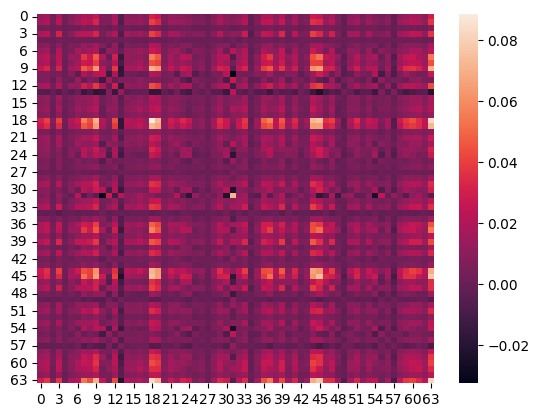

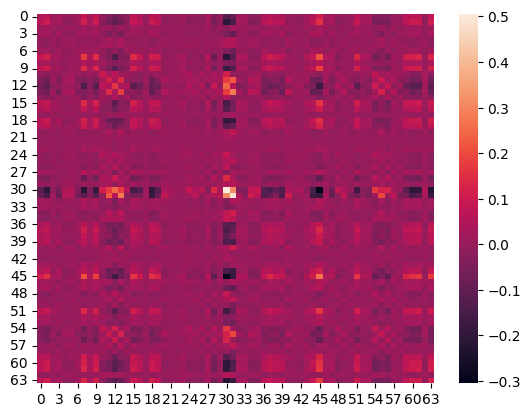

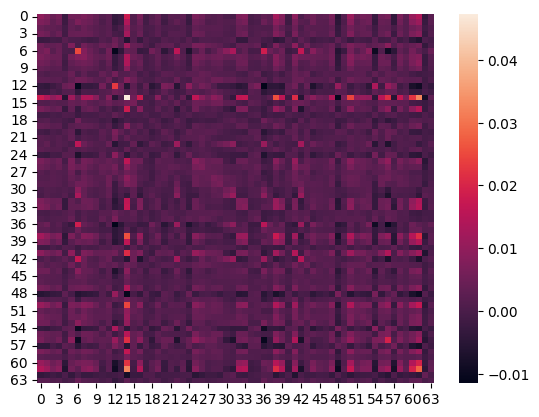

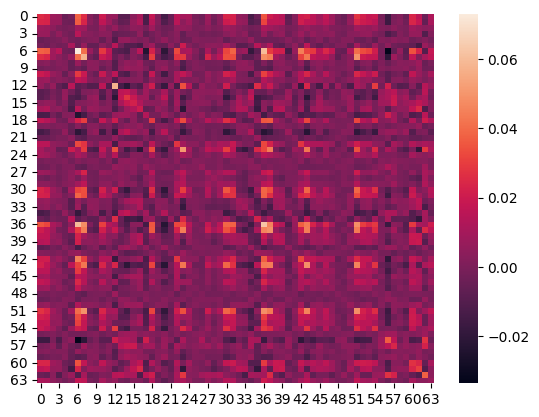

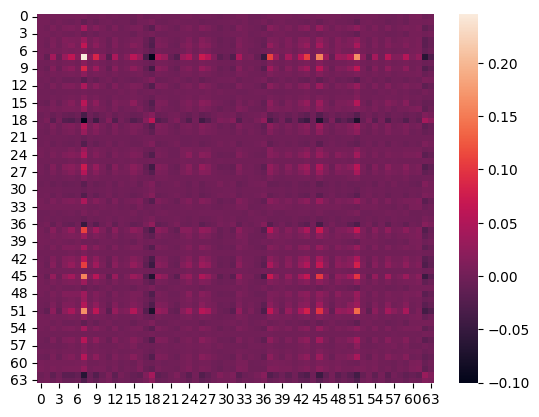

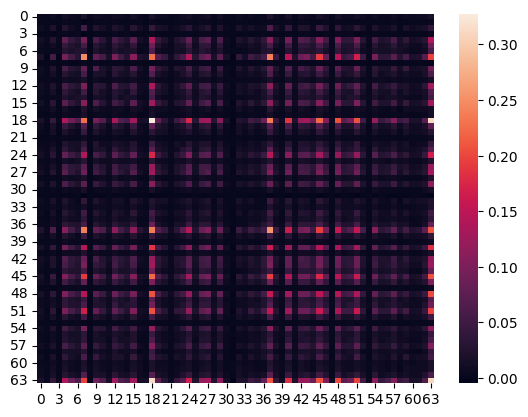

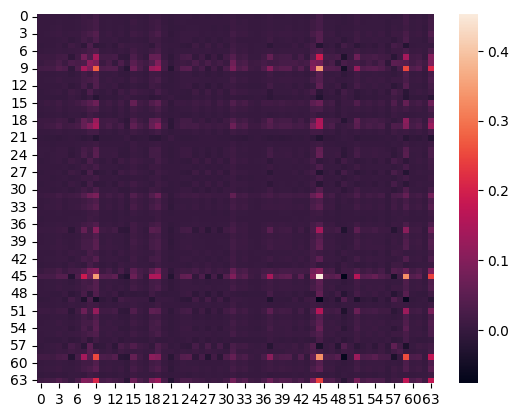

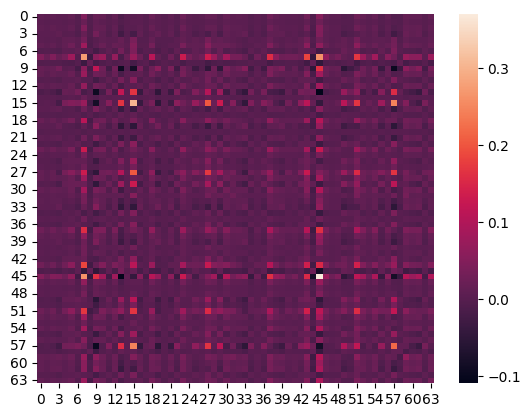

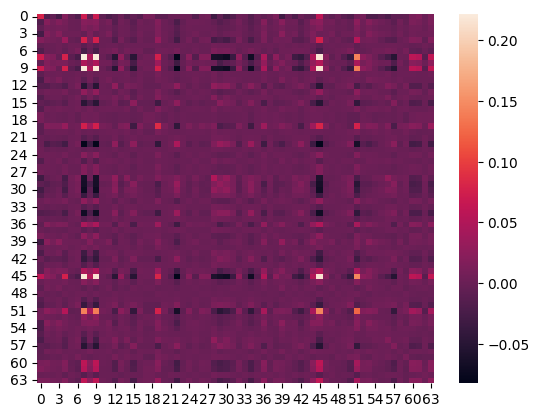

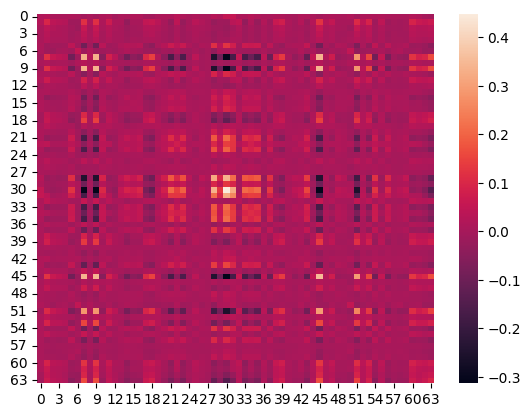

In [ ]:

early_late = np.empty((0,64))

participant_oscillation_early_late = ["first_last.mat"]
i = 0
for i in range(10):
  raw = sc.loadmat(data_path + "first_last.mat")
  raw = raw['output']
  raw.shape
  raw_masked = np.ma.array(raw[:,:,i].squeeze())
  covariance = np.cov(raw_masked)
  # sns.heatmap(covariance)
  # plt.show()
  early_late = np.concatenate((early_late, covariance),axis=0)


In [ ]:
original_labels_sub = np.concatenate(
    (np.full((64,1),1), np.full((64,1),2))).squeeze()

original_labels_all = np.tile(original_labels_sub,5)

#original_labels_new = np.concatenate((original_labels_sub, original_labels_sub))
#original_labels_full = np.concatenate((original_labels_new, original_labels_new))
#original_labels_all = np.concatenate((original_labels_full, original_labels_sub))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(early_late,
                                                    original_labels_all,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
[acc_Ridge, Ridge_predictions] = Perform_classification_RidgeRegression(X_train, y_train, X_test, y_test)
print(acc_Ridge, Ridge_predictions)

0.7604166666666666 [1 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2
 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1
 1 2 2 2 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 1 1 1 1
 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 1 2 1]


Questions:

* How to test/judge beforehand that the data is suitable?
* What is a good score?
* How to improve the score?
* How to expand?
* Which other ones to try besides ridge?

It may be meaningful with underlying structures, more instances to be studied.

70-85 ultimately is fairly good.

Stick with models that work, add on more people, expend.
Read the paper too.

Ridge is best but try out others like Keras. Above all, read the literature and consider this at participant level.